In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPool2D, GlobalMaxPool2D, Reshape, Concatenate
from keras.utils import to_categorical
import skimage

Using TensorFlow backend.


# loading images from folder

In [40]:
import os
from skimage import io
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img_as_ubyte(rgb2gray(img)))
    return images
x_train=np.array(load_images_from_folder('train'))
x_test=np.array(load_images_from_folder('test'))

In [4]:
names=os.listdir('train')

In [5]:
y_train=[]

In [6]:
for name in names:
    y_train.append(name[0])

In [7]:
y_train=np.array(y_train).astype(int)

In [43]:
from skimage.transform import resize
def resizing_to_91(img):
    return resize(img, (32,32))
def resizing_to_96(img):
    return resize(img, (32,32))
for i in range(1500):
    if i<500:
        x_train[i]=resizing_to_91(x_train[i])
        x_test[i]=resizing_to_96(x_test[i])
    else:
        x_train[i]=resizing_to_91(x_train[i])
        

In [45]:
x_train=np.array([item for item in x_train])

In [46]:
x_test=np.array([item for item in x_test])

In [13]:
ohe_train=to_categorical(y_train, num_classes=10)

In [15]:
model = Sequential([
    
    Conv2D(16, (3, 3), padding='same', input_shape= (None, None,1), activation='elu'),
    
    MaxPool2D(),
    Conv2D(32, (3, 3), padding='same', activation='elu'),
    MaxPool2D(),
    Conv2D(64, (3, 3), padding='same', activation='elu'),
    GlobalMaxPool2D(),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 16)    160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 16)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [17]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [18]:
batch_history = LossHistory()

In [59]:
history = model.fit(np.expand_dims(x_train, -1), ohe_train, epochs=500, batch_size=512,callbacks=[batch_history])

Epoch 1/500
1500/1500 [==============================] - 0s 247us/step - loss: 0.2608
Epoch 2/500
1500/1500 [==============================] - 0s 130us/step - loss: 0.3153
Epoch 3/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0683
Epoch 4/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0454
Epoch 5/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0868
Epoch 6/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0129
Epoch 7/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0157
Epoch 8/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0229
Epoch 9/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0157
Epoch 10/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0080
Epoch 11/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0038
Epoch 12/500
1500/1500 [============================

1500/1500 [==============================] - 0s 128us/step - loss: 0.0015
Epoch 189/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0016
Epoch 190/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0013
Epoch 191/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0013
Epoch 192/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0015
Epoch 193/500
1500/1500 [==============================] - 0s 130us/step - loss: 0.0025
Epoch 194/500
1500/1500 [==============================] - 0s 129us/step - loss: 0.0019
Epoch 195/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0015
Epoch 196/500
1500/1500 [==============================] - 0s 125us/step - loss: 0.0017
Epoch 197/500
1500/1500 [==============================] - 0s 126us/step - loss: 0.0014
Epoch 198/500
1500/1500 [==============================] - 0s 126us/step - loss: 0.0016
Epoch 199/500
1500/1500 [=====================

1500/1500 [==============================] - 0s 126us/step - loss: 0.0016
Epoch 375/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0015
Epoch 376/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 377/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0014
Epoch 378/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0017
Epoch 379/500
1500/1500 [==============================] - 0s 126us/step - loss: 0.0011
Epoch 380/500
1500/1500 [==============================] - 0s 126us/step - loss: 0.0024
Epoch 381/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 382/500
1500/1500 [==============================] - 0s 126us/step - loss: 0.0027
Epoch 383/500
1500/1500 [==============================] - 0s 127us/step - loss: 0.0013
Epoch 384/500
1500/1500 [==============================] - 0s 128us/step - loss: 0.0022
Epoch 385/500
1500/1500 [=====================

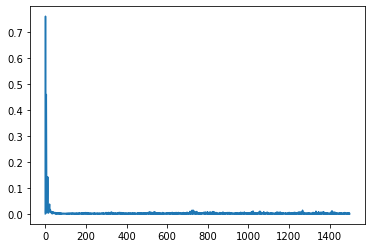

In [63]:
plt.plot(batch_history.losses[0:])
plt.show()

In [64]:
predicted=model.predict(np.expand_dims(x_test, -1))

In [65]:
ans=np.argmax(predicted, axis=1)

In [66]:
import os
names=os.listdir('test')
ids=[]
for name in names:
    ids.append(name)

In [67]:
for i in range(len(ids)):
    ids[i]=ids[i].split(".")[0]

In [68]:
pd.DataFrame({'Id': np.array(ids).astype(int),'Predicted': ans}).to_csv('solution.csv', index=False)
